# 추천시스템 기초 실습

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [129]:
path = 'ml-latest-small/' 
movie = pd.read_csv(path + 'movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [130]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

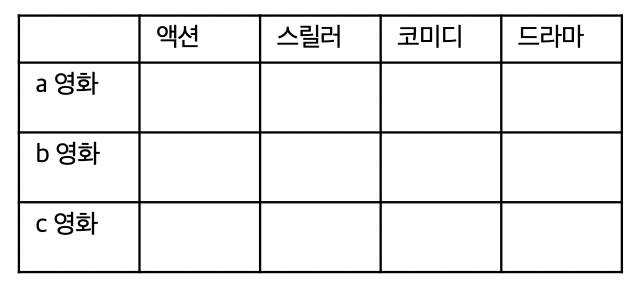

In [131]:
# 기존 데이터는 genres에 대하여 다중값을 가지고 있기 때문에 이를 split 하여 같은 movieId에 stack 해준다.
dup_movie = movie.set_index(movie.columns.drop('genres', 1).tolist()).genres.str.split('|', expand= True).stack().reset_index().rename(columns={0:'genres'}).loc[:, movie.columns]
dup_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy


In [132]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당
piv = dup_movie.groupby('movieId').genres.value_counts().unstack()
piv.head()

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
movie['corpus'] = movie['genres'].apply(lambda x : ' '.join(x.split('|')))

In [136]:
tfidv = TfidfVectorizer().fit(movie['corpus'])

In [137]:
temp = pd.DataFrame(tfidv.transform(movie['corpus']).toarray())

In [138]:
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
CBF = pd.DataFrame(cosine_similarity(piv.fillna(0)))

In [14]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF.index = piv.index
CBF.columns = piv.index
CBF

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [260]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId) :
    # movieId의 제목, 장르 출력 
    title = movie.loc[movie.movieId == movieId, 'title'].tolist()[0]
    genres = movie.loc[movie.movieId == movieId, 'genres'].tolist()[0]
    print(f'입력 영화 : {title}')
    print(f'입력 영화 장르 : {genres}')
    print()
    print('=====Most similar List=====')
    
    # 유사도가 높은 순으로 출력
    top_list = CBF.loc[:, movieId].sort_values(ascending = False).drop(index = movieId)[:10].index # 자기 자신을 제외한 영화
    top_10 = pd.DataFrame(movie.query('movieId in @top_list'))
    top_10.set_index(top_10.movieId.values, inplace = True)
    
    return top_10
    

In [261]:
getCBF(193583)

입력 영화 : No Game No Life: Zero (2017)
입력 영화 장르 : Animation|Comedy|Fantasy

=====Most similar List=====


,movieId,title,genres,corpus
4158,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
6773,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
7228,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
62336,62336,FLCL (2000),Animation|Comedy|Fantasy|Sci-Fi,Animation Comedy Fantasy Sci-Fi
72356,72356,Partly Cloudy (2009),Animation|Children|Comedy|Fantasy,Animation Children Comedy Fantasy
72692,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
79008,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
126577,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
139855,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy
182297,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [149]:
# User-Item 간 선호도 데이터프레임 만들기

rating = pd.read_csv(path + 'ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [150]:
# rating과 genres가 분리된 movie merge
rating_merge = pd.merge(rating, dup_movie, on = 'movieId')

In [151]:
rating_merge

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure
1,1,1,4.0,964982703,Toy Story (1995),Animation
2,1,1,4.0,964982703,Toy Story (1995),Children
3,1,1,4.0,964982703,Toy Story (1995),Comedy
4,1,1,4.0,964982703,Toy Story (1995),Fantasy
...,...,...,...,...,...,...
274475,610,160836,3.0,1493844794,Hazard (2005),Drama
274476,610,160836,3.0,1493844794,Hazard (2005),Thriller
274477,610,163937,3.5,1493848789,Blair Witch (2016),Horror
274478,610,163937,3.5,1493848789,Blair Witch (2016),Thriller


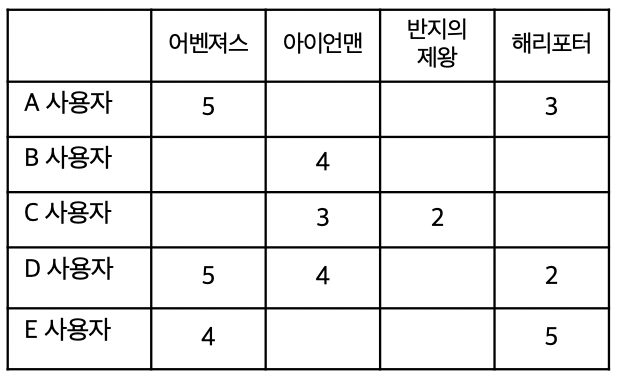

In [152]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
piv = pd.pivot_table(rating, values = 'rating', index = 'userId', columns = 'movieId')
piv

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# 사용자 간 유사도 구하기
CF = pd.DataFrame(cosine_similarity(piv.fillna(0)))

In [154]:
# 사용자와 사용자의 유사도를 구할 때 꼭 코사인 유사도를 사용하지 않아도 됩니당
# 코사인 유사도
CF.index = piv.index
CF.columns = piv.index
CF

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [73]:
rating_merge = pd.merge(rating, dup_movie, on = 'movieId')
rating_merge

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure
1,1,1,4.0,964982703,Toy Story (1995),Animation
2,1,1,4.0,964982703,Toy Story (1995),Children
3,1,1,4.0,964982703,Toy Story (1995),Comedy
4,1,1,4.0,964982703,Toy Story (1995),Fantasy
...,...,...,...,...,...,...
274475,610,160836,3.0,1493844794,Hazard (2005),Drama
274476,610,160836,3.0,1493844794,Hazard (2005),Thriller
274477,610,163937,3.5,1493848789,Blair Witch (2016),Horror
274478,610,163937,3.5,1493848789,Blair Witch (2016),Thriller


In [226]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(userId):
     
    # userId가 평가한 영화에 대한 list
    user_l = piv.iloc[userId,:][piv.iloc[userId,:].notnull()].index.tolist()
    # userId와 가장 가까운 유저 추출
    neighbor_user = CF.loc[:, userId].sort_values(ascending = False).drop(index = userId).sort_values(ascending = False)[:1].index[0]
    # userId와 가장 가까윤 유저의 영화 평가 상위 목록
    neighbor_user_l = piv.iloc[neighbor_user, :].sort_values(ascending= False).index.tolist()
    
    # userId가 시청한 목록 제거 
    movie_list = []

    for m in neighbor_user_l :
        if m not in user_l :
            movie_list.append(m)
    
    # 가장 가까운 유저의 top5 영화 목록 리스트 출력
    neighbor_user_top = piv.loc[neighbor_user,movie_list].sort_values(ascending = False)[:5].index.tolist()
    top_5 = pd.DataFrame(movie.query('movieId in @neighbor_user_top'))
    top_5.set_index(pd.Series(top_5.movieId.values,name ='movieId'), inplace = True)
    
    # 유저가 가장 선호하는 영화 장르에 대하여 count 한 후 barplot으로 출력
    user_like = rating_merge[rating_merge.userId == userId].pivot_table(values='rating', columns = 'genres',aggfunc='count').T.sort_values('rating', ascending = False)
    plt.title(f"{userId}'s favorite genres'")
    x= range(user_like.shape[0])
    plt.bar(x, height = 'rating', data = user_like)
    plt.xticks(x, user_like.index, rotation = 90)
    plt.show()
    
    print("=====Recommendation List=====")
    
    return top_5

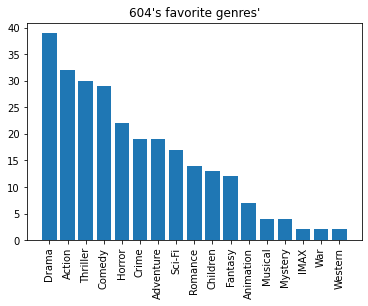

=====Recommendation List=====


,movieId,title,genres,corpus
movieId,,,,
22,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,Crime Drama Horror Mystery Thriller
112,112,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime,Action Adventure Comedy Crime
280,280,Murder in the First (1995),Drama|Thriller,Drama Thriller
293,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,Action Crime Drama Thriller
318,318,"Shawshank Redemption, The (1994)",Crime|Drama,Crime Drama


In [227]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [228]:
import MF

In [229]:
# 사용자-영화 선호도 데이터프레임입니당
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
# MF.py를 참고하여 인자를 입력해 보아유
factorizer = MF.MatrixFactorization(np.array(piv.fillna(0)), k=30, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0024
Iteration: 20 ; cost = 0.0023
Iteration: 30 ; cost = 0.0022
Iteration: 40 ; cost = 0.0021
Iteration: 50 ; cost = 0.0020
Iteration: 60 ; cost = 0.0019
Iteration: 70 ; cost = 0.0019
Iteration: 80 ; cost = 0.0018
Iteration: 90 ; cost = 0.0018
Iteration: 100 ; cost = 0.0017
User Latent P:
[[-0.15742714 -0.18511179 -0.09041756 ...  0.05655663  0.0105691
   0.07105331]
 [-0.78293355  0.30963951 -0.21079532 ...  0.41843979  0.1487592
  -0.90849474]
 [ 0.52547705  1.56933099 -0.66922305 ... -0.04873915 -1.36868263
   0.97013793]
 ...
 [-0.21785053  0.34067239 -0.34228256 ... -0.23937955  0.00380661
   0.29828326]
 [ 0.85013863 -0.69407625 -0.68143107 ...  0.22914495  0.10087359
   0.07582985]
 [ 0.00826742  0.06878517  0.05015635 ... -0.05526432 -0.05228311
  -0.03981967]]
Item Latent Q:
[[-0.06026326 -0.0423141  -0.06425405 ... -0.02014353  0.55335579
   0.11606108]
 [-0.11116947 -0.18666339 -0.95132122 ... -1.60718581  0.87817062
   0.40534681]
 [-0.04783692 -0.

In [237]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.931217,4.305404,3.956778,1.705700,3.450873,4.621143,4.409257,3.097492,3.530804,4.373051,...,6.081344,4.334739,3.882496,5.075617,2.670114,4.331819,5.882767,4.873403,2.941820,5.418943
1,3.380150,3.848591,0.615978,6.144179,4.061970,2.400699,2.939043,2.496235,1.062775,2.215909,...,1.854745,0.103721,0.298825,5.544787,-2.659230,5.772805,1.881098,5.746099,4.267868,2.642024
2,3.697874,2.854979,1.991926,-0.308029,3.975870,3.626272,3.221650,-1.303809,-1.980902,3.755135,...,5.741789,2.073389,3.415316,-2.589073,-1.276735,0.786396,-1.045772,-3.075495,3.435185,6.685389
3,3.151423,2.124002,2.435625,2.557421,1.505779,2.752530,1.188150,1.915694,2.816705,2.907742,...,0.477212,4.594794,3.465333,6.138026,1.325395,4.900466,4.420201,2.525181,2.997380,1.959556
4,3.629545,5.519158,4.419217,7.291787,2.903283,4.484760,1.584579,5.753187,5.187100,2.851622,...,1.709347,7.486459,6.548534,6.269058,2.230624,3.500834,4.382088,2.842169,3.336117,4.404277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.847120,3.418677,3.089159,2.450006,2.915338,3.934000,3.080996,3.077929,2.811361,3.424870,...,3.124148,3.683860,4.243308,4.059783,3.284735,3.490417,3.048340,3.850330,3.684383,3.508988
606,3.697549,3.501013,4.210608,2.502374,3.505427,5.501130,3.595998,0.961511,4.600439,4.768623,...,6.960516,2.463541,4.088935,4.694373,6.167886,4.533728,0.457250,4.400832,5.600840,3.419235
607,3.856190,2.681698,2.582194,1.890772,2.784393,3.674726,2.336591,2.612482,2.643733,3.853945,...,3.793994,3.418028,4.574325,4.917066,0.247996,3.867487,3.538112,1.575263,4.025550,4.769654
608,2.944642,2.886978,3.077153,1.036480,3.176251,3.210996,2.242958,4.588428,3.984023,4.112157,...,7.435257,-6.499326,2.408130,-1.792135,7.648032,2.608757,3.355873,6.081365,0.388330,5.742256


## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

In [269]:
#위의 Matrix Factorization으로 만들어낸 행렬을 통하여 추천 리스트 생성

matrix_factor = pd.DataFrame(R_reduced)

def getMF(userId) :
    #matrix_factorization은 index가 0부터 시작하므로 기존과 다르게 1를 빼줘야한다.
    userId -= 1
    # 학습된 matrix_factorization으로 영화에 대한 선호도를 추출한다.
    re_predictions = matrix_factor.iloc[userId].sort_values(ascending = False).reset_index()
    re_predictions.columns = ['movieId','Predictions']
    
    # 유저가 그동안 평가한 영화 리스트 및 영화 정보와 유저 정보를 merge한다.
    user_l = rating[rating.userId == userId]
    user_like = user_l.merge(movie, on ='movieId').sort_values(by = 'rating', ascending=False)
    
    # 그 후 유저가 평가를 한 영화가 있으면 추천 영화에서 제외가 되고
    recommendations = movie[~movie.movieId.isin(user_like.movieId)]
    # 영화에 대한 선호도를 merge한 후 top10에 대한 영화들을 return해준다.
    recommendations = recommendations.merge(pd.DataFrame(re_predictions), on = 'movieId').sort_values(by = 'Predictions',ascending = False).set_index('movieId')[:10]
    return recommendations

In [270]:
getMF(603)

,title,genres,corpus,Predictions
movieId,,,,
4583,Disorganized Crime (1989),Action|Comedy,Action Comedy,6.519458
8968,After the Sunset (2004),Action|Adventure|Comedy|Crime|Thriller,Action Adventure Comedy Crime Thriller,6.392747
4497,Dead Heat (1988),Action|Comedy|Horror|Sci-Fi,Action Comedy Horror Sci-Fi,6.353006
5458,Like Mike (2002),Children|Comedy|Fantasy,Children Comedy Fantasy,6.286981
5707,Absence of Malice (1981),Drama|Romance,Drama Romance,6.220524
7315,Against the Ropes (2004),Comedy|Drama,Comedy Drama,6.199906
4240,Just Visiting (2001),Comedy|Fantasy,Comedy Fantasy,6.076327
7444,13 Going on 30 (2004),Comedy|Fantasy|Romance,Comedy Fantasy Romance,6.075478
3987,Bounce (2000),Drama|Romance,Drama Romance,6.049689
